<a href="https://colab.research.google.com/github/nananana25/MSI140/blob/main/MIS140A1_Praba_200000072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('/content/MIS140_GlideWise360_data.csv')
display(df)

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,1.010120e+08,SM-10,1/1/2011,2011,Jan,0,red,Clear,3.3,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
1,2.010120e+08,SM-11,1/1/2011,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,3.010120e+08,SM-02,1/1/2011,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,4.010120e+08,SM-02,1/1/2011,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,5.010120e+08,SM-09,1/1/2011,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8.640000e+11,SM-11,31/12/2011,2011,Dec,19,purple,Clear,11.7,12,54,15,Winter,No,Saturday,No,73,19.0,92
8641,8.640000e+11,SM-06,31/12/2011,2011,Dec,20,white,Clear,11.7,12,54,15,Winter,No,Saturday,No,63,8.0,71
8642,8.640000e+11,SM-10,31/12/2011,2011,Dec,21,green,Clear,10.8,11,58,13,Winter,No,Saturday,No,50,2.0,52
8643,8.640000e+11,SM-12,31/12/2011,2011,Dec,22,green,Clear,9.9,10,62,9,Winter,No,Saturday,No,36,2.0,38


In [16]:
print(df.shape)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

(8645, 19)
Number of rows: 8645
Number of columns: 19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RecordID                     8645 non-null   float64
 1   Shift_Manager_Code           8645 non-null   object 
 2   Date                         8645 non-null   object 
 3   Year                         8645 non-null   int64  
 4   Month                        8645 non-null   object 
 5   Hour                         8645 non-null   int64  
 6   Session_colour               8532 non-null   object 
 7   Weather_Outcast              8645 non-null   object 
 8   Temperature_Celsius          8645 non-null   float64
 9   Feeling_Temperature_Celsius  8645 non-null   int64  
 10  Humidity_Percent             8645 non-null   int64  
 11  Wind_Speed_kph               8645 non-null   int64  
 12  Season                       8645 non-null   object 
 13  Public_Holiday    

In [17]:
# Missing values
df.isna().sum()

,0
RecordID,0
Shift_Manager_Code,0
Date,0
Year,0
Month,0
Hour,0
Session_colour,113
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


In [18]:
df.describe()

,RecordID,Date,Year,Hour,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
count,8.645000e+03,8645,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8558.000000,8645.000000
mean,4.323456e+11,2011-07-03 09:29:50.213996800,2011.0,11.573626,14.991209,14.953962,64.350029,12.825564,115.193869,47.813157,143.794448
min,1.010120e+08,2011-01-01 00:00:00,2011.0,0.000000,-7.100000,-16.000000,0.000000,0.000000,0.000000,-15.000000,1.000000
25%,2.160000e+11,2011-04-04 00:00:00,2011.0,6.000000,7.000000,5.000000,49.000000,7.000000,26.000000,3.000000,31.000000
50%,4.320000e+11,2011-07-04 00:00:00,2011.0,12.000000,15.500000,16.000000,65.000000,13.000000,90.000000,14.000000,109.000000
75%,6.480000e+11,2011-10-02 00:00:00,2011.0,18.000000,23.000000,25.000000,81.000000,19.000000,168.000000,39.000000,211.000000
max,8.650000e+11,2011-12-31 00:00:00,2011.0,23.000000,85.000000,50.000000,135.000000,150.000000,567.000000,9999.000000,651.000000
std,2.495808e+11,NaN,0.0,6.907822,9.333185,11.665929,19.643758,8.383611,109.461014,400.877584,133.797854


In [9]:
df.head()

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,101012011.0,SM-10,1/1/2011,2011,Jan,0,red,Clear,3.3,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
1,201012011.0,SM-11,1/1/2011,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,301012011.0,SM-02,1/1/2011,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,401012011.0,SM-02,1/1/2011,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,501012011.0,SM-09,1/1/2011,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1


Step 3: Clean the Data

In [19]:
# Missing value
df.isna().sum()

,0
RecordID,0
Shift_Manager_Code,0
Date,0
Year,0
Month,0
Hour,0
Session_colour,113
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df)

          RecordID Shift_Manager_Code        Date  Year Month  Hour  \
0     1.010120e+08              SM-10    1/1/2011  2011   Jan     0   
1     2.010120e+08              SM-11    1/1/2011  2011   Jan     1   
2     3.010120e+08              SM-02    1/1/2011  2011   Jan     2   
3     4.010120e+08              SM-02    1/1/2011  2011   Jan     3   
4     5.010120e+08              SM-09    1/1/2011  2011   Jan     4   
...            ...                ...         ...   ...   ...   ...   
8640  8.640000e+11              SM-11  31/12/2011  2011   Dec    19   
8641  8.640000e+11              SM-06  31/12/2011  2011   Dec    20   
8642  8.640000e+11              SM-10  31/12/2011  2011   Dec    21   
8643  8.640000e+11              SM-12  31/12/2011  2011   Dec    22   
8644  8.650000e+11              SM-07  31/12/2011  2011   Dec    23   

     Session_colour Weather_Outcast  Temperature_Celsius  \
0               red           Clear                  3.3   
1             black        

Convert data to date time

In [20]:
df

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,1.010120e+08,SM-10,2011-01-01,2011,Jan,0,red,Clear,3.3,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
1,2.010120e+08,SM-11,2011-01-01,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,3.010120e+08,SM-02,2011-01-01,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,4.010120e+08,SM-02,2011-01-01,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,5.010120e+08,SM-09,2011-01-01,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8.640000e+11,SM-11,2011-12-31,2011,Dec,19,purple,Clear,11.7,12,54,15,Winter,No,Saturday,No,73,19.0,92
8641,8.640000e+11,SM-06,2011-12-31,2011,Dec,20,white,Clear,11.7,12,54,15,Winter,No,Saturday,No,63,8.0,71
8642,8.640000e+11,SM-10,2011-12-31,2011,Dec,21,green,Clear,10.8,11,58,13,Winter,No,Saturday,No,50,2.0,52
8643,8.640000e+11,SM-12,2011-12-31,2011,Dec,22,green,Clear,9.9,10,62,9,Winter,No,Saturday,No,36,2.0,38


In [21]:
# Fix data types
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
print(df['Date'])

0      2011-01-01
1      2011-01-01
2      2011-01-01
3      2011-01-01
4      2011-01-01
          ...    
8640   2011-12-31
8641   2011-12-31
8642   2011-12-31
8643   2011-12-31
8644   2011-12-31
Name: Date, Length: 8645, dtype: datetime64[ns]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   RecordID                     8645 non-null   float64       
 1   Shift_Manager_Code           8645 non-null   object        
 2   Date                         8645 non-null   datetime64[ns]
 3   Year                         8645 non-null   int64         
 4   Month                        8645 non-null   object        
 5   Hour                         8645 non-null   int64         
 6   Session_colour               8532 non-null   object        
 7   Weather_Outcast              8645 non-null   object        
 8   Temperature_Celsius          8645 non-null   float64       
 9   Feeling_Temperature_Celsius  8645 non-null   int64         
 10  Humidity_Percent             8645 non-null   int64         
 11  Wind_Speed_kph               8645 non-null 

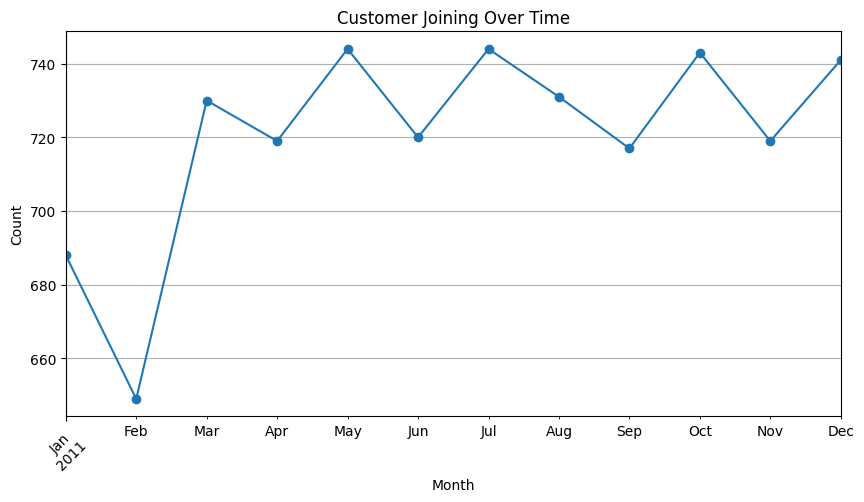

In [23]:
import matplotlib.pyplot as plt

# Group data by month and count occurrences
df_grouped = df.groupby(df['Date'].dt.to_period("M")).size()

# Plot
plt.figure(figsize=(10,5))
df_grouped.plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Customer Joining Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


Handle missing data

In [25]:
# Check the total number of missing values per column
df.isnull().sum()

,0
RecordID,0
Shift_Manager_Code,0
Date,0
Year,0
Month,0
Hour,0
Session_colour,113
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


In [24]:
# Check the total number of missing values per column sorted by descending order
df.isnull().sum().sort_values(ascending=False)

,0
Session_colour,113
Casual_User_Count,87
RecordID,0
Date,0
Shift_Manager_Code,0
Month,0
Year,0
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


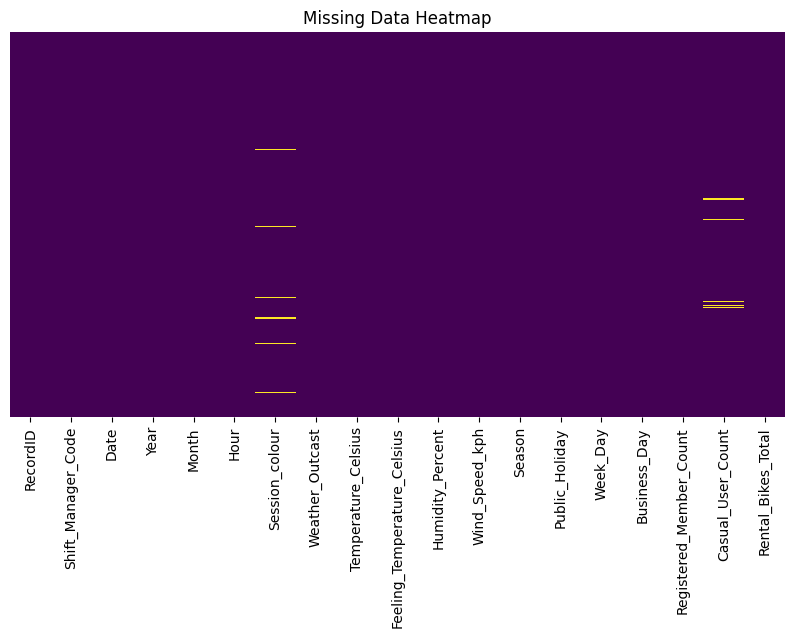

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing values as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [27]:
# Display the rows that contain missing values
df[df.isnull().any(axis=1)]


,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,1.010120e+08,SM-10,2011-01-01,2011,Jan,0,red,Clear,3.3,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
9,1.001012e+09,SM-05,2011-01-01,2011,Jan,9,NaN,Clear,7.0,7,76,0,Winter,Yes,Saturday,No,6,8.0,14
54,5.503012e+09,SM-05,2011-01-03,2011,Jan,9,NaN,Clear,-0.5,-7,43,26,Winter,No,Monday,yes,81,7.0,88
62,6.303012e+09,SM-13,2011-01-03,2011,Jan,17,green,Clear,3.3,-1,30,15,Winter,No,Monday,yes,146,NaN,157
71,7.204012e+09,SM-11,2011-01-04,2011,Jan,2,green,Clear,-1.4,-6,63,9,Winter,No,Tuesday,yes,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8508,8.510000e+11,SM-03,2011-12-26,2011,Dec,6,white,Clear,7.0,4,45,19,Winter,Yes,Monday,No,4,NaN,4
8557,8.560000e+11,SM-11,2011-12-28,2011,Dec,8,NaN,Clear,7.0,3,57,24,Winter,No,Wednesday,yes,206,11.0,217
8571,8.570000e+11,SM-03,2011-12-28,2011,Dec,22,blue,Clear,2.3,0,44,7,Winter,No,Wednesday,yes,31,NaN,33
8582,8.580000e+11,SM-11,2011-12-29,2011,Dec,9,red,Mist and Cloudy,1.4,-2,64,9,Winter,No,Thursday,yes,155,NaN,170


In [30]:
# Remove missing value
df.dropna()

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
1,2.010120e+08,SM-11,2011-01-01,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,3.010120e+08,SM-02,2011-01-01,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,4.010120e+08,SM-02,2011-01-01,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,5.010120e+08,SM-09,2011-01-01,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1
5,6.010120e+08,SM-12,2011-01-01,2011,Jan,5,black,Mist and Cloudy,3.3,1,75,6,Winter,Yes,Saturday,No,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8.640000e+11,SM-11,2011-12-31,2011,Dec,19,purple,Clear,11.7,12,54,15,Winter,No,Saturday,No,73,19.0,92
8641,8.640000e+11,SM-06,2011-12-31,2011,Dec,20,white,Clear,11.7,12,54,15,Winter,No,Saturday,No,63,8.0,71
8642,8.640000e+11,SM-10,2011-12-31,2011,Dec,21,green,Clear,10.8,11,58,13,Winter,No,Saturday,No,50,2.0,52
8643,8.640000e+11,SM-12,2011-12-31,2011,Dec,22,green,Clear,9.9,10,62,9,Winter,No,Saturday,No,36,2.0,38


Missing values with the column mode (for categorical data)

In [33]:
# Replace ["ColumnName"] with "your column"
df["Session_colour"] = df["Session_colour"].fillna(df["Session_colour"].mode())
display(df)

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
1,2.010120e+08,SM-11,2011-01-01,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,3.010120e+08,SM-02,2011-01-01,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,4.010120e+08,SM-02,2011-01-01,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,5.010120e+08,SM-09,2011-01-01,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1
5,6.010120e+08,SM-12,2011-01-01,2011,Jan,5,black,Mist and Cloudy,3.3,1,75,6,Winter,Yes,Saturday,No,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8.640000e+11,SM-11,2011-12-31,2011,Dec,19,purple,Clear,11.7,12,54,15,Winter,No,Saturday,No,73,19.0,92
8641,8.640000e+11,SM-06,2011-12-31,2011,Dec,20,white,Clear,11.7,12,54,15,Winter,No,Saturday,No,63,8.0,71
8642,8.640000e+11,SM-10,2011-12-31,2011,Dec,21,green,Clear,10.8,11,58,13,Winter,No,Saturday,No,50,2.0,52
8643,8.640000e+11,SM-12,2011-12-31,2011,Dec,22,green,Clear,9.9,10,62,9,Winter,No,Saturday,No,36,2.0,38


Handle duplicated data

In [36]:
# Check for duplicate rows
duplicates = df.duplicated()
df[duplicates]

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total


In [35]:
# Sumiing duplicated data
df.duplicated().sum()

np.int64(0)

In [38]:
# Remove duplicates
df.drop_duplicates()

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
1,2.010120e+08,SM-11,2011-01-01,2011,Jan,1,black,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,32,8.0,40
2,3.010120e+08,SM-02,2011-01-01,2011,Jan,2,blue,Clear,2.3,2,80,0,Winter,Yes,Saturday,No,27,5.0,32
3,4.010120e+08,SM-02,2011-01-01,2011,Jan,3,green,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,10,3.0,13
4,5.010120e+08,SM-09,2011-01-01,2011,Jan,4,black,Clear,3.3,3,75,0,Winter,Yes,Saturday,No,1,0.0,1
5,6.010120e+08,SM-12,2011-01-01,2011,Jan,5,black,Mist and Cloudy,3.3,1,75,6,Winter,Yes,Saturday,No,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8.640000e+11,SM-11,2011-12-31,2011,Dec,19,purple,Clear,11.7,12,54,15,Winter,No,Saturday,No,73,19.0,92
8641,8.640000e+11,SM-06,2011-12-31,2011,Dec,20,white,Clear,11.7,12,54,15,Winter,No,Saturday,No,63,8.0,71
8642,8.640000e+11,SM-10,2011-12-31,2011,Dec,21,green,Clear,10.8,11,58,13,Winter,No,Saturday,No,50,2.0,52
8643,8.640000e+11,SM-12,2011-12-31,2011,Dec,22,green,Clear,9.9,10,62,9,Winter,No,Saturday,No,36,2.0,38


Step 4: Transform Data